In [1]:
import pandas as pd
import numpy as np
import requests
import mplfinance as mpf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from myutility import *

In [2]:
emotions_df = pd.read_csv("data_Nov.mp4.csv")
emotions_df

,angry,disgust,fear,happy,sad,surprise,neutral
0,0.32,0.0,0.03,0.01,0.06,0.00,0.58
1,0.82,0.0,0.04,0.00,0.05,0.00,0.09
2,0.52,0.0,0.03,0.01,0.07,0.00,0.37
3,0.71,0.0,0.02,0.00,0.05,0.00,0.22
4,0.19,0.0,0.01,0.01,0.05,0.00,0.73
...,...,...,...,...,...,...,...
59711,0.14,0.0,0.01,0.51,0.06,0.04,0.23
59712,0.27,0.0,0.02,0.42,0.04,0.01,0.24
59713,0.16,0.0,0.02,0.56,0.06,0.01,0.20
59714,0.32,0.0,0.03,0.28,0.06,0.01,0.31


Assuming 30FPS

Fed issues FOMC statement on November 01 2023 2pm EDT. Typically, the press conference is held half an hour after the statement release.
Assuming half an hour, the press conference would start at 2.30pm

In [3]:
regrouped_df = regroup_all_emotions(df=emotions_df)
regrouped_df = add_datetime_index("2023-11-01 14:30:00", df=regrouped_df)
regrouped_df

,angry,disgust,fear,happy,sad,surprise,neutral
2023-11-01 14:30:00,0.417939,0.000106,0.046956,0.008811,0.068883,0.004578,0.450244
2023-11-01 14:31:00,0.337922,0.000106,0.048883,0.002272,0.077700,0.002983,0.527356
2023-11-01 14:32:00,0.314239,0.000200,0.052311,0.003661,0.085156,0.004067,0.537761
2023-11-01 14:33:00,0.302178,0.001383,0.136094,0.101072,0.221806,0.010544,0.225733
2023-11-01 14:34:00,0.330478,0.000556,0.061189,0.011717,0.107472,0.005839,0.480283
2023-11-01 14:35:00,0.359161,0.000439,0.061683,0.007489,0.101578,0.006261,0.460444
2023-11-01 14:36:00,0.343122,0.000300,0.068689,0.002789,0.119433,0.005178,0.457844
2023-11-01 14:37:00,0.270889,0.000456,0.048528,0.024189,0.098600,0.009506,0.545644
2023-11-01 14:38:00,0.206800,0.000228,0.024800,0.074261,0.049811,0.019683,0.623444
2023-11-01 14:39:00,0.158961,0.000050,0.022522,0.085672,0.045100,0.009189,0.676700


In [4]:
updated_df = emotion_df_log(df=regrouped_df) # to play around with
updated_df = negative_score_ratio(updated_df)

In [5]:
API_KEY = 'JDRUHFYE77G75DS7'
symbol = 'VXX'
interval = '1min'

# url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&apikey={API_KEY}'
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&extended_hours=false&month=2023-11&outputsize=full&apikey={API_KEY}"
r = requests.get(url)
data = r.json()

time_series_key = next(key for key in data.keys() if "Time Series" in key)  # Find the correct key for the time series data

vxx_df = pd.DataFrame(data[time_series_key]).T

vxx_df.index = pd.to_datetime(vxx_df.index)
for column in vxx_df.columns:
    vxx_df[column] = pd.to_numeric(vxx_df[column], errors='coerce')

column_mapping = {
    '1. open': 'Open',
    '2. high': 'High',
    '3. low': 'Low',
    '4. close': 'Close',
    '5. volume': 'Volume'
}
vxx_df.rename(columns=column_mapping, inplace=True)
vxx_df.sort_index(inplace=True)

Regular Trading Hours (9.30am to 4.00pm US Eastern Time)

In [6]:
# resampled_df = pd.DataFrame()

# resampled_df['Open'] = df['Open'].resample('3T').first()
# resampled_df['High'] = df['High'].resample('3T').max()
# resampled_df['Low'] = df['Low'].resample('3T').min()
# resampled_df['Close'] = df['Close'].resample('3T').last()
# resampled_df['Delta_3min'] = (resampled_df['Close'] - resampled_df['Open']) / resampled_df['Open']
# resampled_df['Volume'] = df['Volume'].resample('3T').sum()

# resampled_df

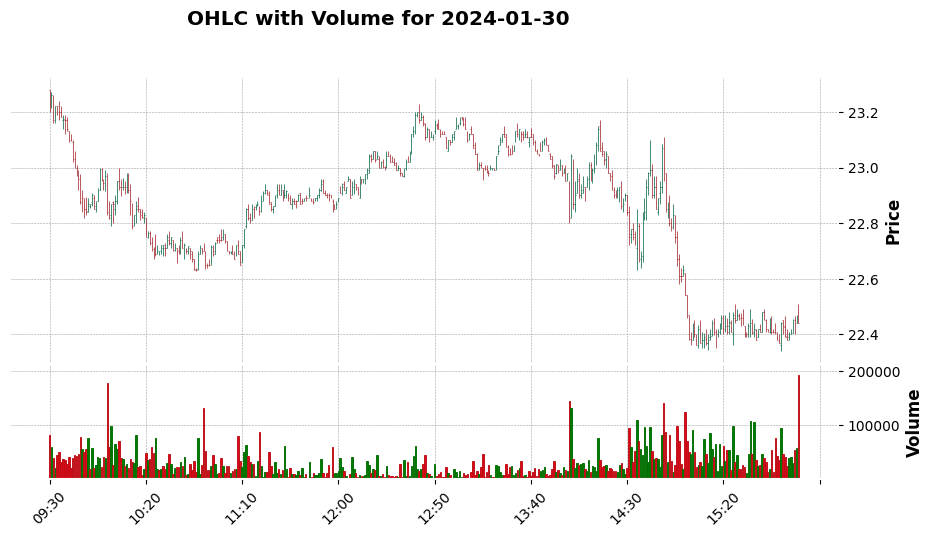

In [7]:
mpf.plot(vxx_df.loc['2023-11-01'].dropna(), type='ohlc', figratio=(20,10), style='charles',
         title='OHLC with Volume for 2024-01-30', volume=True)

In [8]:
merged_df = updated_df.merge(vxx_df, left_index=True, right_index=True)
merged_df = merged_df.drop(["Open", "High", "Low", "Volume"], axis=1)
merged_df['delta_change'] = merged_df['Close'].pct_change()
merged_df['delta_change_1_period'] = merged_df['delta_change'].shift()
merged_df

,angry,disgust,fear,happy,sad,surprise,neutral,negative_score,Close,delta_change,delta_change_1_period
2023-11-01 14:30:00,0.349204,0.000106,0.045886,0.008773,0.066614,0.004567,0.371732,0.545307,22.840,NaN,NaN
2023-11-01 14:31:00,0.291118,0.000106,0.047726,0.002270,0.074829,0.002979,0.423538,0.491094,22.750,-0.003940,NaN
2023-11-01 14:32:00,0.273258,0.000200,0.050989,0.003654,0.081723,0.004058,0.430328,0.481124,22.780,0.001319,-0.003940
2023-11-01 14:33:00,0.264038,0.001382,0.127596,0.096284,0.200330,0.010489,0.203539,0.656604,22.760,-0.000878,0.001319
2023-11-01 14:34:00,0.285538,0.000555,0.059390,0.011649,0.102080,0.005822,0.392234,0.522082,22.720,-0.001757,-0.000878
2023-11-01 14:35:00,0.306868,0.000439,0.059856,0.007461,0.096743,0.006242,0.378741,0.541725,22.790,0.003081,-0.001757
2023-11-01 14:36:00,0.294997,0.000300,0.066433,0.002785,0.112823,0.005164,0.376959,0.552151,22.670,-0.005265,0.003081
2023-11-01 14:37:00,0.239717,0.000455,0.047387,0.023901,0.094037,0.009461,0.435441,0.448726,22.680,0.000441,-0.005265
2023-11-01 14:38:00,0.187972,0.000228,0.024497,0.071633,0.048610,0.019492,0.484550,0.312202,22.820,0.006173,0.000441
2023-11-01 14:39:00,0.147524,0.000050,0.022272,0.082199,0.044113,0.009147,0.516828,0.260249,22.840,0.000876,0.006173


## Linear Regression

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

X1 = merged_df[['angry', 'disgust', 'fear', 'sad']].iloc[2:]
y1 = merged_df['delta_change_1_period'].dropna(axis=0)
reg1 = LinearRegression().fit(X1,y1)
print("reg1 score: ", reg1.score(X1,y1))

X2 = merged_df[['negative_score']].iloc[2:]
y2 = merged_df['delta_change_1_period'].dropna(axis=0)
reg2 = LinearRegression().fit(X2, y2)
print("reg2 score: ", reg2.score(X2, y2))

X3 = merged_df[['angry', 'disgust', 'fear', 'sad']].iloc[1:]
y3 = merged_df['delta_change'].dropna(axis=0)
reg3 = LinearRegression().fit(X3, y3)
print("reg3 score: ", reg3.score(X3, y3))

X4 = merged_df[['negative_score']].iloc[1:]
y4 = merged_df['delta_change'].dropna(axis=0)
reg4 = LinearRegression().fit(X4, y4)
print("reg4 score: ", reg4.score(X4, y4))

reg1 score:  0.16159076519387305
reg2 score:  0.018211943353035664
reg3 score:  0.11613321035021029
reg4 score:  0.10856649567711474


## Cross Correlation

Between Negative Score and Delta_Change and lag periods

In [10]:
for x in range(1,6):
    correlation = cross_correlation(merged_df['negative_score'], merged_df['delta_change'], x)
correlation

{-5: 0.22612216406827562,
 -4: 0.18124830844635922,
 -3: -0.1170973989341096,
 -2: -0.03962911016540366,
 -1: -0.19110782892126857,
 0: -0.3294943029509236,
 1: -0.13495163338409763,
 2: -0.0589966829203608,
 3: 0.026751932564147585,
 4: 0.031038402771233948,
 5: 0.191374352420917}

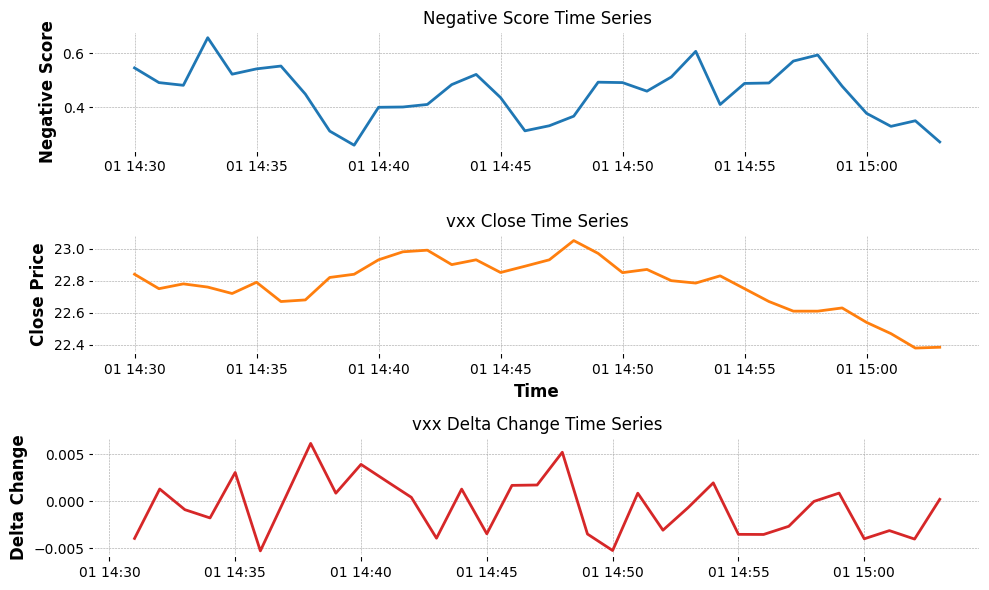

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(10, 6))  # 3 rows, 1 column

# Plot the first time series on the first subplot
axs[0].plot(merged_df.index, merged_df['negative_score'], 'tab:blue')
axs[0].set_title('Negative Score Time Series')
axs[0].set_ylabel('Negative Score')

# Plot the second time series on the second subplot
axs[1].plot(merged_df.index, merged_df['Close'], 'tab:orange')
axs[1].set_title('vxx Close Time Series')
axs[1].set_ylabel('Close Price')
axs[1].set_xlabel('Time')

axs[2].plot(merged_df.index, merged_df['delta_change'], 'tab:red')
axs[2].set_title('vxx Delta Change Time Series')
axs[2].set_ylabel("Delta Change")

# Adjust layout to not overlap
plt.tight_layout()

# Show plot
plt.show()

## Correlation in Moving Averages

Negative Score and delta_change

In [12]:
ma_df = merged_df[['negative_score', 'delta_change']]

for x in range(2,5):
    ma_df[f"negative_score_ma{x}"] = moving_average(ma_df['negative_score'], window=x)
    ma_df[f"delta_change_ma{x}"] = moving_average(ma_df['delta_change'], window=x)

ma_df

,negative_score,delta_change,negative_score_ma2,delta_change_ma2,negative_score_ma3,delta_change_ma3,negative_score_ma4,delta_change_ma4
2023-11-01 14:30:00,0.545307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01 14:31:00,0.491094,-0.003940,0.518200,NaN,NaN,NaN,NaN,NaN
2023-11-01 14:32:00,0.481124,0.001319,0.486109,-0.001311,0.505842,NaN,NaN,NaN
2023-11-01 14:33:00,0.656604,-0.000878,0.568864,0.000220,0.542941,-0.001167,0.543532,NaN
2023-11-01 14:34:00,0.522082,-0.001757,0.589343,-0.001318,0.553270,-0.000439,0.537726,-0.001314
2023-11-01 14:35:00,0.541725,0.003081,0.531903,0.000662,0.573470,0.000149,0.550384,0.000441
2023-11-01 14:36:00,0.552151,-0.005265,0.546938,-0.001092,0.538653,-0.001314,0.568140,-0.001205
2023-11-01 14:37:00,0.448726,0.000441,0.500439,-0.002412,0.514201,-0.000581,0.516171,-0.000875
2023-11-01 14:38:00,0.312202,0.006173,0.380464,0.003307,0.437693,0.000449,0.463701,0.001107
2023-11-01 14:39:00,0.260249,0.000876,0.286225,0.003525,0.340392,0.002497,0.393332,0.000556


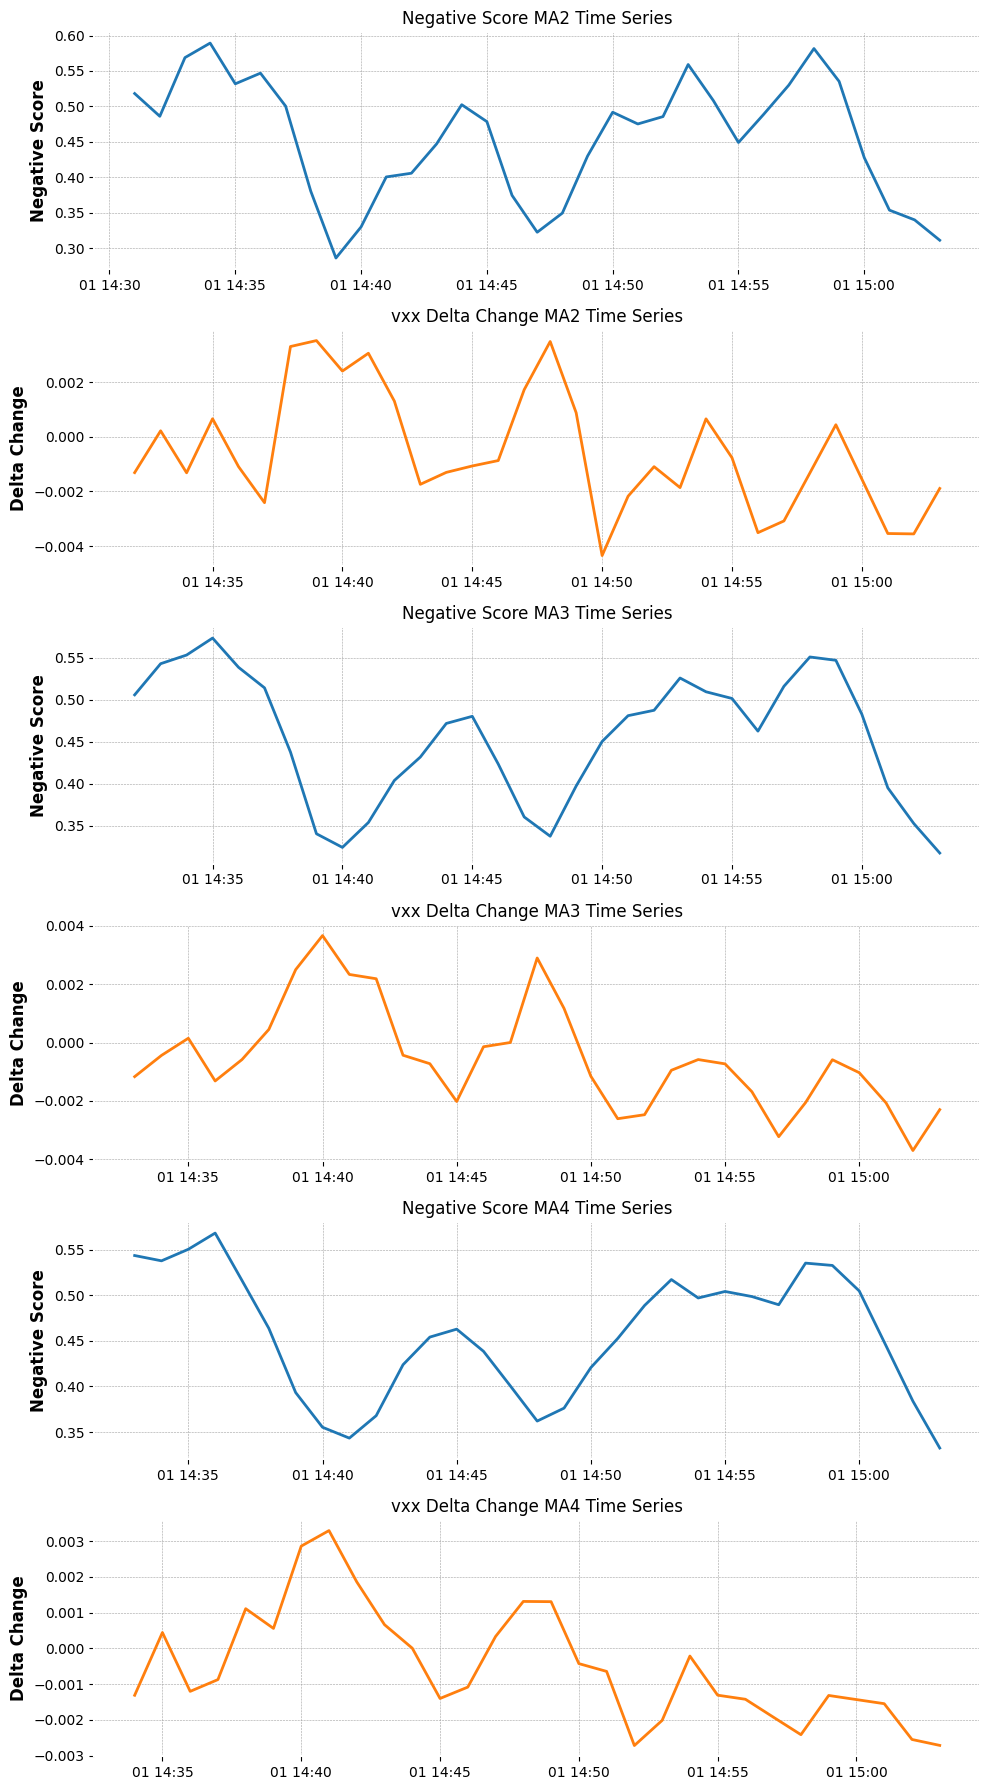

<Figure size 640x480 with 0 Axes>

In [13]:
number_of_rows = 3*2

fig, axs = plt.subplots(6, 1, figsize=(10, 18))  # 6 rows, 1 column

for i in range(3):
    ma_number = i + 2

    axs[i*2].plot(ma_df.index, ma_df[f'negative_score_ma{ma_number}'], 'tab:blue')
    axs[i*2].set_title(f'Negative Score MA{ma_number} Time Series')
    axs[i*2].set_ylabel('Negative Score')

    # Plotting Delta Change MA
    axs[i*2 + 1].plot(ma_df.index, ma_df[f'delta_change_ma{ma_number}'], 'tab:orange')
    axs[i*2 + 1].set_title(f'vxx Delta Change MA{ma_number} Time Series')
    axs[i*2 + 1].set_ylabel('Delta Change')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

In [14]:
for window in range(2,5):
    ma_corr = ma_df[f'negative_score_ma{window}'].corr(ma_df[f'delta_change_ma{window}'])
    print(f"Correlation for MA{window}: {ma_corr}")

Correlation for MA2: -0.3739434780345386
Correlation for MA3: -0.43305801023361895
Correlation for MA4: -0.5130093326042873


## Testing for Cointegration
Negative Score and Delta Change

In [15]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, coint    

series1 = ma_df['negative_score'].iloc[1:]
series2 = ma_df['delta_change'].dropna()

coint_t, p_value, crit_values = coint(series1, series2)
print(f"Cointegration test statistic: {coint_t}")
print(f"P-value: {p_value}")
print(f"Critical Values: ", crit_values)

# Interpretation
if p_value < 0.05:
    print("Series are likely cointegrated.")
else:
    print("No strong evidence of cointegration.")
print("--------")

Cointegration test statistic: -2.6616833721463524
P-value: 0.21366117861463335
Critical Values:  [-4.27142809 -3.53373371 -3.17964375]
No strong evidence of cointegration.
--------


In [16]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, coint


for i in range(2,5):
    series1 = ma_df[f'negative_score_ma{i}'].iloc[i:]
    series2 = ma_df[f'delta_change_ma{i}'].iloc[i:]

    coint_t, p_value, crit_values = coint(series1, series2)
    print(f"Cointegration test statistic for MA{i}: {coint_t}")
    print(f"P-value for MA{i}: {p_value}")
    print(f"Critical Values for MA{i}: ", crit_values)

    # Interpretation
    if p_value < 0.05:
        print("Series are likely cointegrated.")
    else:
        print("No strong evidence of cointegration.")
    print("--------")

Cointegration test statistic for MA2: -2.648474765068017
P-value for MA2: 0.2186547588422389
Critical Values for MA2:  [-4.28461471 -3.5403299  -3.18409329]
No strong evidence of cointegration.
--------
Cointegration test statistic for MA3: -2.1637774001515795
P-value for MA3: 0.44311369732778894
Critical Values for MA3:  [-4.29875556 -3.54738111 -3.18884556]
No strong evidence of cointegration.
--------
Cointegration test statistic for MA4: -2.3499169573759358
P-value for MA4: 0.34892689088672624
Critical Values for MA4:  [-4.31395736 -3.55493606 -3.19393252]
No strong evidence of cointegration.
--------


## Dynamic Time Warping
Negative Score and Delta Change

DTW Distance: 2.5132763307235884
DTW Distance for MA2: 2.6069310737691986
DTW Distance for MA3: 2.5654387647973853
DTW Distance for MA4: 2.516156546778439


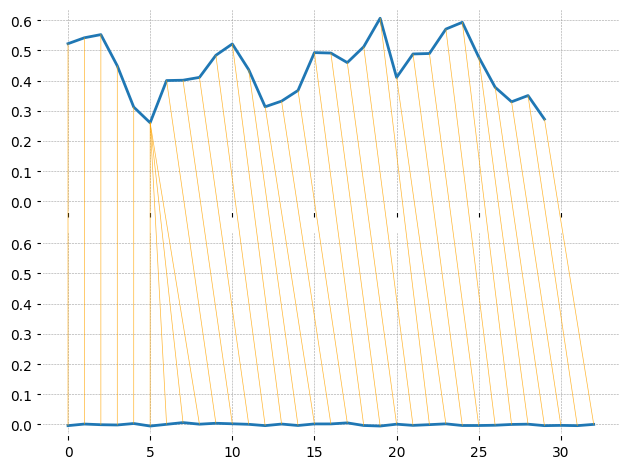

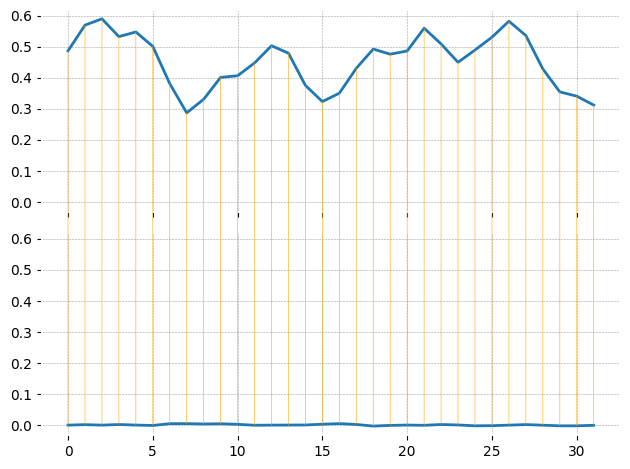

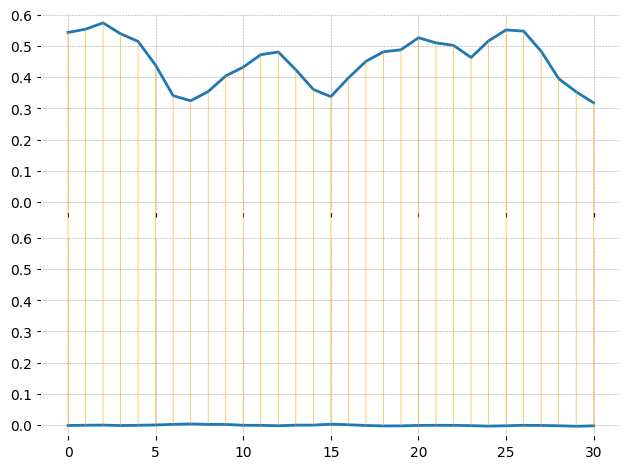

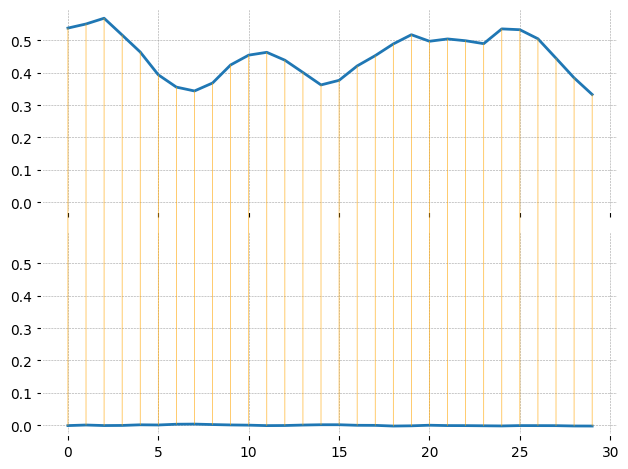

In [17]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

series1 = ma_df[f'negative_score'].iloc[i:].to_numpy()
series2 = ma_df[f'delta_change'].dropna().to_numpy()

distance, paths = dtw.warping_paths(series1, series2, window=25, use_pruning=True)
print(f"DTW Distance: {distance}")

# Obtain the best path
best_path = dtw.best_path(paths)

# Visualize the warping path
dtwvis.plot_warping(series1, series2, best_path)

for i in range(2,5):
    series1 = ma_df[f'negative_score_ma{i}'].iloc[i:].to_numpy()
    series2 = ma_df[f'delta_change_ma{i}'].iloc[i:].to_numpy()

    distance, paths = dtw.warping_paths(series1, series2, window=25, use_pruning=True)
    print(f"DTW Distance for MA{i}: {distance}")

    # Obtain the best path
    best_path = dtw.best_path(paths)

    # Visualize the warping path
    dtwvis.plot_warping(series1, series2, best_path)

## Stationarity Test (ADF)

In [18]:
print("Testing stationarity for 'negative_score':")
test_stationarity(ma_df['negative_score'].iloc[1:])

# Test stationarity for 'delta_change'
print("\nTesting stationarity for 'delta_change':")
test_stationarity(ma_df['delta_change'].dropna())

# Test stationarity for moving averages
for i in range(2, 5):
    print(f"\nTesting stationarity for 'negative_score_ma{i}':")
    test_stationarity(ma_df[f'negative_score_ma{i}'].iloc[i:])

    print(f"\nTesting stationarity for 'delta_change_ma{i}':")
    test_stationarity(ma_df[f'delta_change_ma{i}'].iloc[i:])

Testing stationarity for 'negative_score':
Results of Dickey-Fuller Test:
Test Statistic                 -2.445797
p-value                         0.129225
#Lags Used                      0.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64

Testing stationarity for 'delta_change':
Results of Dickey-Fuller Test:
Test Statistic                 -5.473924
p-value                         0.000002
#Lags Used                      0.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64

Testing stationarity for 'negative_score_ma2':
Results of Dickey-Fuller Test:
Test Statistic                 -3.640655
p-value                         0.005030
#Lags Used                      1.000000
Number of Observations Used    30.000000
Critic